## Internshala Data Science Challenge - Final Project

### Problem Statement

Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not. 

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that you pay regularly to an insurance company for this guarantee.

Building a model to predict whether a customer would make the premium payment can be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers who are less likely to pay and convince them to continue making timely payment.

Now, in order to predict, whether the customer would pay the next premium or not, you have information about past premium payment history for the policyholders along with their demographics (age, monthly income, area type) and sourcing channel etc.

### The Dataset
Two csv files are provided '

| ﻿Variable                         | Definition                                                                                                         |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------|
| id                               | Unique ID of the policy                                                                                            |
| perc_premium_paid_by_cash_credit | Percentage of premium amount paid by cash or credit card                                                           |
| age_in_days                      | Age in days of policy holder                                                                                       |
| Income                           | Monthly Income of policy holder                                                                                    |
| Count_3-6_months_late            | No of premiums late by 3 to 6 months                                                                               |
| Count_6-12_months_late           | No  of premiums late by 6 to 12 months                                                                             |
| Count_more_than_12_months_late   | No of premiums late by more than 12 months                                                                         |
| application_underwriting_score   | Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured) |
| no_of_premiums_paid              | Total premiums paid on time till now                                                                               |
| sourcing_channel                 | Sourcing channel for application                                                                                   |
| residence_area_type              | Area type of Residence (Urban/Rural)                                                                               |
| target                           | 1 - premium paid on time, 0 - otherwise                                                                            |


### 1. Importing important libraries

In [870]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

### 2. Load and check the shape of the data

In [871]:
# Loading the train and test datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [872]:
# Check the shape of the data
train.shape, test.shape

((79853, 12), (34224, 11))

In [873]:
# Check first 5 rows of train dataset
train.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0  110936                             0.429        12058  355060   
1   41492                             0.010        21546  315150   
2   31300                             0.917        17531   84140   
3   19415                             0.049        15341  250510   
4   99379                             0.052        31400  198680   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    2.0                     3.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.02   
1                             0.0                           99.89   
2                             1.0                           98.69   
3                             0.0                           99.57   
4                             0.0                           99.87   

   no_of_premiums_paid sourcing_channel residence_area_type  target  
0                   13                C               Urban       1  
1                   21                A               Urban       1  
2                    7                C               Rural       0  
3                    9                A               Urban       1  
4                   12                B               Urban       1

In [874]:
# Check first 5 rows of test dataset
test.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                             NaN   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid sourcing_channel residence_area_type  
0                    7                A               Rural  
1                   19                A               Urban  
2                    2                B               Urban  
3                   11                B               Rural  
4                   14                A               Rural

In [875]:
# We will be working on the train data to build our model
# describe the train data to check the numerical variations on the dataset
train.describe()

id  perc_premium_paid_by_cash_credit   age_in_days  \
count   79853.000000                      79853.000000  79853.000000   
mean    57167.166368                          0.314288  18846.696906   
std     32928.970160                          0.334915   5208.719136   
min         2.000000                          0.000000   7670.000000   
25%     28640.000000                          0.034000  14974.000000   
50%     57262.000000                          0.167000  18625.000000   
75%     85632.000000                          0.538000  22636.000000   
max    114076.000000                          1.000000  37602.000000   

             Income  Count_3-6_months_late  Count_6-12_months_late  \
count  7.985300e+04           79756.000000            79756.000000   
mean   2.088472e+05               0.248671                0.078188   
std    4.965826e+05               0.691468                0.436507   
min    2.403000e+04               0.000000                0.000000   
25%    1.080100e+05               0.000000                0.000000   
50%    1.665600e+05               0.000000                0.000000   
75%    2.520900e+05               0.000000                0.000000   
max    9.026260e+07              13.000000               17.000000   

       Count_more_than_12_months_late  application_underwriting_score  \
count                    79756.000000                    76879.000000   
mean                         0.060008                       99.067291   
std                          0.312023                        0.739799   
min                          0.000000                       91.900000   
25%                          0.000000                       98.810000   
50%                          0.000000                       99.210000   
75%                          0.000000                       99.540000   
max                         11.000000                       99.890000   

       no_of_premiums_paid        target  
count         79853.000000  79853.000000  
mean             10.863887      0.937410  
std               5.170687      0.242226  
min               2.000000      0.000000  
25%               7.000000      1.000000  
50%              10.000000      1.000000  
75%              14.000000      1.000000  
max              60.000000      1.000000

In [876]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

### 3. Univariate Analysis
We will analyze different variables in train data one at a time to check the variations and treat accordingly

In [877]:
# 'perc_premium_paid_by_cash_credit'

# Let's convert the values to percentages by adding a column 'percentage_by_cash_credit'
train['percentage_by_cash_credit'] = train.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)


In [878]:
train.percentage_by_cash_credit.describe()

count    79853.000000
mean        31.428774
std         33.491457
min          0.000000
25%          3.400000
50%         16.700000
75%         53.800000
max        100.000000
Name: percentage_by_cash_credit, dtype: float64

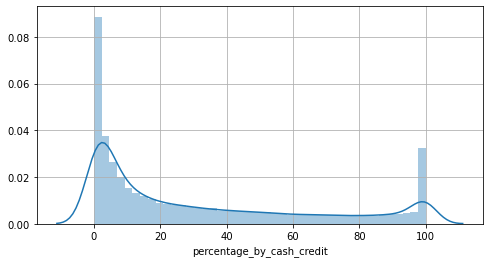

In [879]:
plt.figure(figsize=(8, 4))
sns.distplot(train.percentage_by_cash_credit)
plt.grid()
plt.show()

In [880]:
# 'age_in_days'
# Let's modify the age by adding a new column 'age_in_years' using 'age_in_days'
train['age_in_years'] = train.age_in_days.apply(lambda x: x/365)

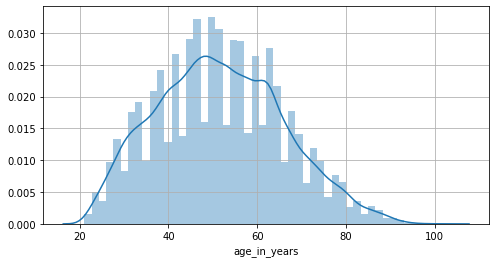

In [881]:
plt.figure(figsize=(8, 4))
sns.distplot(train.age_in_years)
plt.grid()
plt.show()

### 4. Finding and treating the NUll Values, if any.

In [882]:
# checking for null values in train data
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
percentage_by_cash_credit              0
age_in_years                           0
dtype: int64

We will treat the columns with missing values as follows -

- We can assume that there were no cases of late payments for columns `Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late`. Thus, we can replace the NULL values in these with `0`.
- For `application_underwriting_score`, we can use the **mean** of present values in the column to replace the null values

In [883]:
# Treating null values for 'late payments' with 0s
train['Count_3-6_months_late'].fillna(0, inplace=True)
train['Count_6-12_months_late'].fillna(0, inplace=True)
train['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [884]:
# Treating null values for 'application_underwriting_score' with mean value
train['application_underwriting_score'].fillna(train[train['application_underwriting_score'].notnull()]['application_underwriting_score'].mean(), inplace=True)

In [885]:
# Check the data again for the null values
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
percentage_by_cash_credit           0
age_in_years                        0
dtype: int64

As we can see, all the null values have been treated accordingly.

### 4. Bivariate Analysis
Analysing the correlation between all the numeric variables in the data and the possibilty of multi-collinearity before building the model.

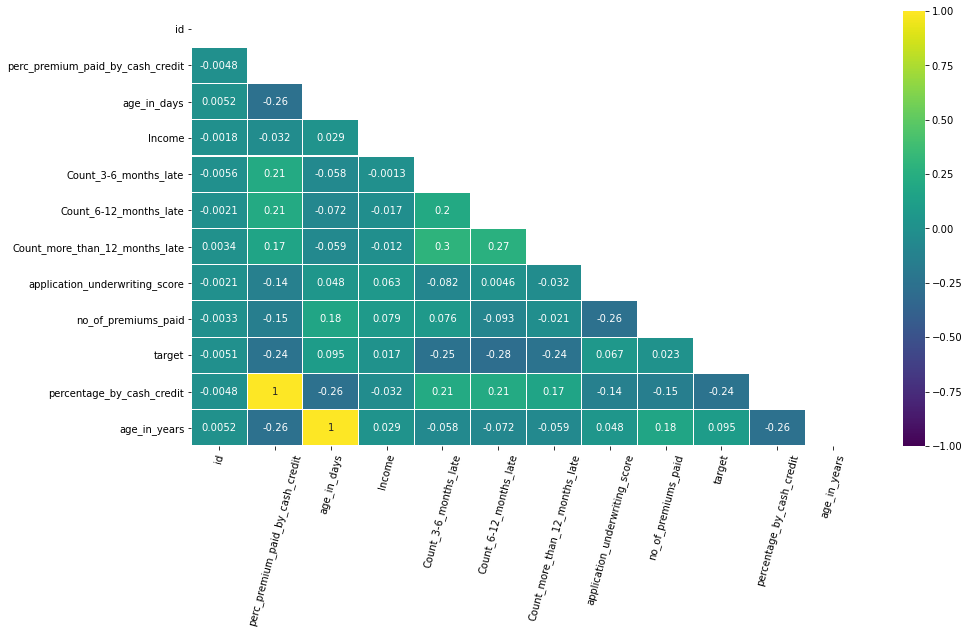

In [886]:
plt.figure(figsize=(15, 8))
corr_plot = train.corr()
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot, linewidth=.1, vmin=-1, vmax=1, cmap='viridis', annot=True, mask = mask)
plt.xticks(rotation=75)
plt.show()

We achieve following observation from the heatmap above -

- Variables `percentage_by_cash_credit`, `Count_3-6_months_late`, `Count_6-12_months_late`, `Count_more_than_12_months_late` share good enough correlation with `target`. 

In [887]:
# Let's add up the total late payments into one new column 'total_late_count' and check for correlation again
train['total_late_count'] = train['Count_more_than_12_months_late'] + train['Count_6-12_months_late'] + train['Count_3-6_months_late']


In [888]:
train[['total_late_count','target']].corr()

total_late_count    target
total_late_count          1.000000 -0.353315
target                   -0.353315  1.000000

We can clearly notice a stronger correlation between late payments and 'target' variables. This could positively affect our prediction

In [889]:
# Let's calculate the percentage of late payments upon all the paid premiums into a new column 'perc_late_count'
train['perc_late_count'] = train['total_late_count']/train['no_of_premiums_paid']

In [890]:
# Check the correlation of 'perc_late_count' with 'target'
train[['perc_late_count','target']].corr()

perc_late_count    target
perc_late_count         1.000000 -0.333177
target                 -0.333177  1.000000

#### Thus, we will use 'total_late_count' and not 'perc_late_count'  as its more correlated for late payments with target variable.

In [891]:
# Check the correlation values again for 'target' wrt to other variables
train.corr()['target']

id                                 -0.005064
perc_premium_paid_by_cash_credit   -0.240980
age_in_days                         0.095103
Income                              0.016541
Count_3-6_months_late              -0.246469
Count_6-12_months_late             -0.284034
Count_more_than_12_months_late     -0.238482
application_underwriting_score      0.067333
no_of_premiums_paid                 0.022664
target                              1.000000
percentage_by_cash_credit          -0.240980
age_in_years                        0.095103
total_late_count                   -0.353315
perc_late_count                    -0.333177
Name: target, dtype: float64

In [892]:
train.shape, train.columns

((79853, 16),
 Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
        'target', 'percentage_by_cash_credit', 'age_in_years',
        'total_late_count', 'perc_late_count'],
       dtype='object'))

We will include variables only with better correlation for model building. 
 Thus, we drop `id`, `perc_premium_paid_by_cash_credit`, `perc_late_count`, `age_in_days` from the model building.

In [893]:
# Let's convert the categorical columns to numeric using pandas dummies
train = pd.get_dummies(train)

In [894]:
train.shape, train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79853 non-null  float64
 5   Count_6-12_months_late            79853 non-null  float64
 6   Count_more_than_12_months_late    79853 non-null  float64
 7   application_underwriting_score    79853 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   target                            79853 non-null  int64  
 10  percentage_by_cash_credit         79853 non-null  float64
 11  age_in_years                      79853 non-null  float64
 12  tota

((79853, 21), None)

As we can see `sourcing_channel` and `residence_area_type` columns has been sub divided into 5 and 2 different numeric cols respectively.

### 5. Perform all transformations performed on analysis of train data to test data as well.

In [895]:
# Check the shape of test data
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [896]:
# Converting the values of 'perc_premium_paid_by_cash_credit' to percentages
test['percentage_by_cash_credit'] = test.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)

In [897]:
test.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                             NaN   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid sourcing_channel residence_area_type  \
0                    7                A               Rural   
1                   19                A               Urban   
2                    2                B               Urban   
3                   11                B               Rural   
4                   14                A               Rural   

   percentage_by_cash_credit  
0                        0.1  
1                       12.4  
2                      100.0  
3                       19.8  
4                        4.1

In [898]:
test.percentage_by_cash_credit.describe()

count    34224.000000
mean        31.445743
std         33.405873
min          0.000000
25%          3.400000
50%         16.900000
75%         54.000000
max        100.000000
Name: percentage_by_cash_credit, dtype: float64

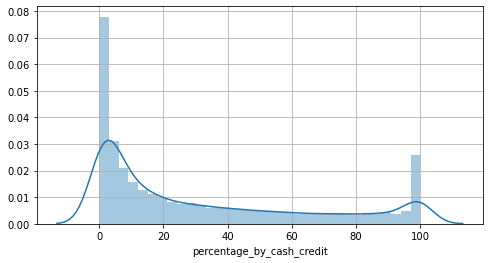

In [899]:
plt.figure(figsize=(8, 4))
sns.distplot(test.percentage_by_cash_credit)
plt.grid()
plt.show()

In [900]:
# Converting 'age_in_days' to 'age_in_years'
test['age_in_years'] = test.age_in_days.apply(lambda x: x/365)

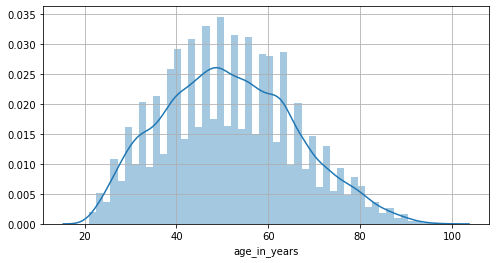

In [901]:
plt.figure(figsize=(8, 4))
sns.distplot(test.age_in_years)
plt.grid()
plt.show()

In [902]:
# Check and treat the missing values, if any.
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
percentage_by_cash_credit              0
age_in_years                           0
dtype: int64

In [903]:
# We treat the null values in the same way as treated for train data.
# Treating null values for 'late payments' with 0s
test['Count_3-6_months_late'].fillna(0, inplace=True)
test['Count_6-12_months_late'].fillna(0, inplace=True)
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [904]:
# Treating null values for 'application_underwriting_score' with mean value
test['application_underwriting_score'].fillna(test[test['application_underwriting_score'].notnull()]['application_underwriting_score'].mean(), inplace=True)

In [905]:
# check back again for null values
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
percentage_by_cash_credit           0
age_in_years                        0
dtype: int64

In [906]:
# Totaling up all the late payments to 'total_late_count'
test['total_late_count'] = test['Count_more_than_12_months_late'] + test['Count_6-12_months_late'] + test['Count_3-6_months_late']

In [907]:
# Calculating percentage of late payments
test['perc_late_count'] = test['total_late_count']/test['no_of_premiums_paid']

In [908]:
# Split the categorical columns to numeric
test = pd.get_dummies(test)

In [909]:
test.shape, test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                34224 non-null  int64  
 1   perc_premium_paid_by_cash_credit  34224 non-null  float64
 2   age_in_days                       34224 non-null  int64  
 3   Income                            34224 non-null  int64  
 4   Count_3-6_months_late             34224 non-null  float64
 5   Count_6-12_months_late            34224 non-null  float64
 6   Count_more_than_12_months_late    34224 non-null  float64
 7   application_underwriting_score    34224 non-null  float64
 8   no_of_premiums_paid               34224 non-null  int64  
 9   percentage_by_cash_credit         34224 non-null  float64
 10  age_in_years                      34224 non-null  float64
 11  total_late_count                  34224 non-null  float64
 12  perc

((34224, 20), None)

We have completed with the usual exploration/transformation to test data

### 6. Split train data for model training

In [910]:
# Split the train data using train_test_split needed for model training
train_data, val_data = train_test_split(train, test_size=0.35, stratify=train['target'], random_state=1234)

In [911]:
x_train = train_data.drop(['id','target','perc_late_count','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)
y_train = train_data['target']
x_val = val_data.drop(['id','target','perc_late_count','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)
y_val = val_data['target']

In [912]:
print(x_train.shape, x_train.columns, sep='\n')
print('--'*50)
print(x_val.shape, x_val.columns, sep='\n')

(51904, 16)
Index(['Income', 'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'percentage_by_cash_credit', 'age_in_years',
       'total_late_count', 'sourcing_channel_A', 'sourcing_channel_B',
       'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E',
       'residence_area_type_Rural', 'residence_area_type_Urban'],
      dtype='object')
----------------------------------------------------------------------------------------------------
(27949, 16)
Index(['Income', 'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'percentage_by_cash_credit', 'age_in_years',
       'total_late_count', 'sourcing_channel_A', 'sourcing_channel_B',
       'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E',
       'residence_area_type_Rural', 'residence_area_type_Urban'

In [913]:
X_test = test.drop(['id','perc_late_count','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)

### 7. Model Building
#### Using Linear Regression

In [914]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [915]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [916]:
pred = lin_reg.predict(x_val)

In [917]:
pred

array([0.94831352, 0.98969688, 0.97741658, ..., 0.89016854, 0.91405557,
       0.98754591])

In [918]:
lin_reg.score(x_val, y_val)

0.14633602787697997

In [919]:
lin_reg.score(x_train, y_train)

0.16050763721842742

Since, r2 score value does not differ much for the train and validation data. We can depict that our model fits well to the data.

In [920]:
# Make prediction on the test data
new_pred = lin_reg.predict(X_test)

In [921]:
# We can now save the obtained prediction as 'target' values on 'submission' file
new_frame = pd.DataFrame()
new_frame['id'] = test['id']
new_frame['target'] = new_pred

In [922]:
# Saving the new_frame as output to 'submission' file
new_frame.to_csv('submission_Lin_Reg.csv', header=True, index = False)

#### Using Logistic Regression

In [923]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')

In [924]:
log_reg.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [925]:
log_reg.score(x_val, y_val)

0.9391033668467565

In [926]:
log_reg.score(x_train, y_train)

0.9396000308261405

In [927]:
log_reg_pred = log_reg.predict_proba(X_test)

In [928]:
log_reg_pred

array([[0.01058251, 0.98941749],
       [0.0217896 , 0.9782104 ],
       [0.08453134, 0.91546866],
       ...,
       [0.03527031, 0.96472969],
       [0.26846047, 0.73153953],
       [0.02138493, 0.97861507]])

In [929]:
final_prob = np.array(list(map(lambda x: x[1], log_reg_pred)))

In [930]:
log_frame = pd.DataFrame()
log_frame['id'] = test['id']
log_frame['target'] = final_prob

In [931]:
log_frame.to_csv('submission_log_reg.csv', header=True, index=False)

#### Using CatBoostRegressor

In [932]:
from catboost import CatBoostRegressor

In [933]:
cbr = CatBoostRegressor(loss_function='RMSE',
                        eval_metric='AUC', 
                        use_best_model=True)

In [934]:
cbr.fit(x_train, y_train, eval_set=(x_val, y_val), plot=False)

Learning rate set to 0.097199
0:	test: 0.7991080	best: 0.7991080 (0)	total: 13.6ms	remaining: 13.6s
1:	test: 0.8136571	best: 0.8136571 (1)	total: 26.5ms	remaining: 13.2s
2:	test: 0.8151504	best: 0.8151504 (2)	total: 40.1ms	remaining: 13.3s
3:	test: 0.8246998	best: 0.8246998 (3)	total: 56.5ms	remaining: 14.1s
4:	test: 0.8262424	best: 0.8262424 (4)	total: 69.3ms	remaining: 13.8s
5:	test: 0.8264424	best: 0.8264424 (5)	total: 83.9ms	remaining: 13.9s
6:	test: 0.8279742	best: 0.8279742 (6)	total: 99ms	remaining: 14s
7:	test: 0.8282153	best: 0.8282153 (7)	total: 113ms	remaining: 14.1s
8:	test: 0.8284414	best: 0.8284414 (8)	total: 128ms	remaining: 14.1s
9:	test: 0.8287452	best: 0.8287452 (9)	total: 141ms	remaining: 14s
10:	test: 0.8289412	best: 0.8289412 (10)	total: 154ms	remaining: 13.8s
11:	test: 0.8288337	best: 0.8289412 (10)	total: 168ms	remaining: 13.9s
12:	test: 0.8294111	best: 0.8294111 (12)	total: 182ms	remaining: 13.8s
13:	test: 0.8301814	best: 0.8301814 (13)	total: 197ms	remaining: 1

125:	test: 0.8361678	best: 0.8363516 (94)	total: 1.75s	remaining: 12.2s
126:	test: 0.8361671	best: 0.8363516 (94)	total: 1.77s	remaining: 12.1s
127:	test: 0.8361660	best: 0.8363516 (94)	total: 1.78s	remaining: 12.1s
128:	test: 0.8361780	best: 0.8363516 (94)	total: 1.79s	remaining: 12.1s
129:	test: 0.8362774	best: 0.8363516 (94)	total: 1.81s	remaining: 12.1s
130:	test: 0.8362214	best: 0.8363516 (94)	total: 1.83s	remaining: 12.2s
131:	test: 0.8361973	best: 0.8363516 (94)	total: 1.85s	remaining: 12.2s
132:	test: 0.8361828	best: 0.8363516 (94)	total: 1.87s	remaining: 12.2s
133:	test: 0.8361953	best: 0.8363516 (94)	total: 1.88s	remaining: 12.1s
134:	test: 0.8361762	best: 0.8363516 (94)	total: 1.89s	remaining: 12.1s
135:	test: 0.8361576	best: 0.8363516 (94)	total: 1.91s	remaining: 12.1s
136:	test: 0.8361565	best: 0.8363516 (94)	total: 1.92s	remaining: 12.1s
137:	test: 0.8360956	best: 0.8363516 (94)	total: 1.94s	remaining: 12.1s
138:	test: 0.8360873	best: 0.8363516 (94)	total: 1.95s	remaining

247:	test: 0.8352165	best: 0.8363516 (94)	total: 3.51s	remaining: 10.6s
248:	test: 0.8353019	best: 0.8363516 (94)	total: 3.52s	remaining: 10.6s
249:	test: 0.8352966	best: 0.8363516 (94)	total: 3.54s	remaining: 10.6s
250:	test: 0.8353539	best: 0.8363516 (94)	total: 3.55s	remaining: 10.6s
251:	test: 0.8353428	best: 0.8363516 (94)	total: 3.57s	remaining: 10.6s
252:	test: 0.8353421	best: 0.8363516 (94)	total: 3.58s	remaining: 10.6s
253:	test: 0.8353091	best: 0.8363516 (94)	total: 3.6s	remaining: 10.6s
254:	test: 0.8353201	best: 0.8363516 (94)	total: 3.61s	remaining: 10.5s
255:	test: 0.8353497	best: 0.8363516 (94)	total: 3.63s	remaining: 10.6s
256:	test: 0.8353336	best: 0.8363516 (94)	total: 3.65s	remaining: 10.5s
257:	test: 0.8352225	best: 0.8363516 (94)	total: 3.67s	remaining: 10.5s
258:	test: 0.8352759	best: 0.8363516 (94)	total: 3.68s	remaining: 10.5s
259:	test: 0.8352399	best: 0.8363516 (94)	total: 3.7s	remaining: 10.5s
260:	test: 0.8352112	best: 0.8363516 (94)	total: 3.71s	remaining: 

364:	test: 0.8322424	best: 0.8363516 (94)	total: 5.26s	remaining: 9.14s
365:	test: 0.8322146	best: 0.8363516 (94)	total: 5.27s	remaining: 9.13s
366:	test: 0.8321337	best: 0.8363516 (94)	total: 5.28s	remaining: 9.12s
367:	test: 0.8320935	best: 0.8363516 (94)	total: 5.3s	remaining: 9.1s
368:	test: 0.8320687	best: 0.8363516 (94)	total: 5.31s	remaining: 9.08s
369:	test: 0.8320140	best: 0.8363516 (94)	total: 5.32s	remaining: 9.06s
370:	test: 0.8319888	best: 0.8363516 (94)	total: 5.34s	remaining: 9.05s
371:	test: 0.8320135	best: 0.8363516 (94)	total: 5.35s	remaining: 9.03s
372:	test: 0.8320232	best: 0.8363516 (94)	total: 5.37s	remaining: 9.02s
373:	test: 0.8319420	best: 0.8363516 (94)	total: 5.38s	remaining: 9.01s
374:	test: 0.8318950	best: 0.8363516 (94)	total: 5.4s	remaining: 9s
375:	test: 0.8318592	best: 0.8363516 (94)	total: 5.41s	remaining: 8.98s
376:	test: 0.8317928	best: 0.8363516 (94)	total: 5.42s	remaining: 8.96s
377:	test: 0.8317410	best: 0.8363516 (94)	total: 5.44s	remaining: 8.95

486:	test: 0.8295189	best: 0.8363516 (94)	total: 7.01s	remaining: 7.38s
487:	test: 0.8295651	best: 0.8363516 (94)	total: 7.03s	remaining: 7.37s
488:	test: 0.8294628	best: 0.8363516 (94)	total: 7.04s	remaining: 7.36s
489:	test: 0.8294833	best: 0.8363516 (94)	total: 7.05s	remaining: 7.34s
490:	test: 0.8294717	best: 0.8363516 (94)	total: 7.07s	remaining: 7.33s
491:	test: 0.8294833	best: 0.8363516 (94)	total: 7.08s	remaining: 7.31s
492:	test: 0.8294585	best: 0.8363516 (94)	total: 7.11s	remaining: 7.31s
493:	test: 0.8294099	best: 0.8363516 (94)	total: 7.12s	remaining: 7.29s
494:	test: 0.8294255	best: 0.8363516 (94)	total: 7.13s	remaining: 7.28s
495:	test: 0.8293831	best: 0.8363516 (94)	total: 7.15s	remaining: 7.26s
496:	test: 0.8293983	best: 0.8363516 (94)	total: 7.16s	remaining: 7.25s
497:	test: 0.8293562	best: 0.8363516 (94)	total: 7.17s	remaining: 7.23s
498:	test: 0.8294265	best: 0.8363516 (94)	total: 7.19s	remaining: 7.22s
499:	test: 0.8294221	best: 0.8363516 (94)	total: 7.2s	remaining:

604:	test: 0.8277841	best: 0.8363516 (94)	total: 8.75s	remaining: 5.71s
605:	test: 0.8277552	best: 0.8363516 (94)	total: 8.77s	remaining: 5.7s
606:	test: 0.8277493	best: 0.8363516 (94)	total: 8.78s	remaining: 5.69s
607:	test: 0.8277144	best: 0.8363516 (94)	total: 8.8s	remaining: 5.67s
608:	test: 0.8277021	best: 0.8363516 (94)	total: 8.81s	remaining: 5.66s
609:	test: 0.8276905	best: 0.8363516 (94)	total: 8.82s	remaining: 5.64s
610:	test: 0.8276403	best: 0.8363516 (94)	total: 8.84s	remaining: 5.63s
611:	test: 0.8276912	best: 0.8363516 (94)	total: 8.85s	remaining: 5.61s
612:	test: 0.8276166	best: 0.8363516 (94)	total: 8.88s	remaining: 5.6s
613:	test: 0.8276575	best: 0.8363516 (94)	total: 8.89s	remaining: 5.59s
614:	test: 0.8277310	best: 0.8363516 (94)	total: 8.91s	remaining: 5.58s
615:	test: 0.8276456	best: 0.8363516 (94)	total: 8.92s	remaining: 5.56s
616:	test: 0.8276478	best: 0.8363516 (94)	total: 8.94s	remaining: 5.55s
617:	test: 0.8276115	best: 0.8363516 (94)	total: 8.95s	remaining: 5

724:	test: 0.8242038	best: 0.8363516 (94)	total: 10.7s	remaining: 4.05s
725:	test: 0.8241694	best: 0.8363516 (94)	total: 10.7s	remaining: 4.04s
726:	test: 0.8241640	best: 0.8363516 (94)	total: 10.7s	remaining: 4.02s
727:	test: 0.8241012	best: 0.8363516 (94)	total: 10.7s	remaining: 4.01s
728:	test: 0.8240252	best: 0.8363516 (94)	total: 10.7s	remaining: 3.99s
729:	test: 0.8240589	best: 0.8363516 (94)	total: 10.8s	remaining: 3.98s
730:	test: 0.8240834	best: 0.8363516 (94)	total: 10.8s	remaining: 3.96s
731:	test: 0.8240224	best: 0.8363516 (94)	total: 10.8s	remaining: 3.95s
732:	test: 0.8240212	best: 0.8363516 (94)	total: 10.8s	remaining: 3.93s
733:	test: 0.8240130	best: 0.8363516 (94)	total: 10.8s	remaining: 3.92s
734:	test: 0.8240128	best: 0.8363516 (94)	total: 10.8s	remaining: 3.9s
735:	test: 0.8239185	best: 0.8363516 (94)	total: 10.8s	remaining: 3.89s
736:	test: 0.8239412	best: 0.8363516 (94)	total: 10.8s	remaining: 3.87s
737:	test: 0.8239443	best: 0.8363516 (94)	total: 10.9s	remaining:

845:	test: 0.8216168	best: 0.8363516 (94)	total: 12.4s	remaining: 2.26s
846:	test: 0.8215768	best: 0.8363516 (94)	total: 12.4s	remaining: 2.25s
847:	test: 0.8216307	best: 0.8363516 (94)	total: 12.4s	remaining: 2.23s
848:	test: 0.8215893	best: 0.8363516 (94)	total: 12.5s	remaining: 2.22s
849:	test: 0.8216436	best: 0.8363516 (94)	total: 12.5s	remaining: 2.2s
850:	test: 0.8215498	best: 0.8363516 (94)	total: 12.5s	remaining: 2.19s
851:	test: 0.8215600	best: 0.8363516 (94)	total: 12.5s	remaining: 2.17s
852:	test: 0.8214596	best: 0.8363516 (94)	total: 12.5s	remaining: 2.16s
853:	test: 0.8214277	best: 0.8363516 (94)	total: 12.5s	remaining: 2.14s
854:	test: 0.8213164	best: 0.8363516 (94)	total: 12.5s	remaining: 2.13s
855:	test: 0.8212851	best: 0.8363516 (94)	total: 12.6s	remaining: 2.11s
856:	test: 0.8212983	best: 0.8363516 (94)	total: 12.6s	remaining: 2.1s
857:	test: 0.8212211	best: 0.8363516 (94)	total: 12.6s	remaining: 2.08s
858:	test: 0.8211948	best: 0.8363516 (94)	total: 12.6s	remaining: 

961:	test: 0.8180059	best: 0.8363516 (94)	total: 14.2s	remaining: 561ms
962:	test: 0.8179841	best: 0.8363516 (94)	total: 14.2s	remaining: 547ms
963:	test: 0.8179772	best: 0.8363516 (94)	total: 14.2s	remaining: 532ms
964:	test: 0.8179131	best: 0.8363516 (94)	total: 14.3s	remaining: 517ms
965:	test: 0.8178938	best: 0.8363516 (94)	total: 14.3s	remaining: 502ms
966:	test: 0.8178829	best: 0.8363516 (94)	total: 14.3s	remaining: 488ms
967:	test: 0.8178275	best: 0.8363516 (94)	total: 14.3s	remaining: 473ms
968:	test: 0.8177839	best: 0.8363516 (94)	total: 14.3s	remaining: 458ms
969:	test: 0.8177676	best: 0.8363516 (94)	total: 14.3s	remaining: 444ms
970:	test: 0.8177302	best: 0.8363516 (94)	total: 14.4s	remaining: 429ms
971:	test: 0.8177354	best: 0.8363516 (94)	total: 14.4s	remaining: 414ms
972:	test: 0.8176657	best: 0.8363516 (94)	total: 14.4s	remaining: 399ms
973:	test: 0.8177132	best: 0.8363516 (94)	total: 14.4s	remaining: 384ms
974:	test: 0.8176809	best: 0.8363516 (94)	total: 14.4s	remaining

In [935]:
pred = cbr.predict(X_test)

In [936]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['target'] = pred

In [937]:
submission.to_csv('submission-CatBoost.csv',header=True, index = False)

Submitting `submission-CatBoost.csv`, since catboost gives the best score out of all 3.